In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import requests
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\yahya\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
stock_dict = {}

stock_list = []

date = input("Pick a start date for your analysis (YYYY-MM-DD): ")

while (True):
    name = input("Add a stock ticker to the list: ")
    stock_dict[name] = date
    stock_list.append(name)
    cont = input("Press 'y' to Add Another Stock, press 'Enter' to exit")
    if cont == "":
        break;

Pick a start date for your analysis (YYYY-MM-DD):  2015-01-01
Add a stock ticker to the list:  TSLA
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  MSFT
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  AMD
Press 'y' to Add Another Stock, press 'Enter' to exit 


In [4]:
def stockCreation(stock_dict, stock_list):
    func_list = []
    for key, value in stock_dict.items():
        globals()[key] = pdr.DataReader(f'{key}','yahoo',value)
        globals()[key] = globals()[key]['Adj Close']
        func_list.append(globals()[key])
    
    portfolio = pd.concat(func_list, axis='columns', join='inner')
    portfolio.columns = stock_list
    
    return portfolio

In [5]:
portfolio = stockCreation(stock_dict, stock_list)
portfolio.head()

,TSLA,MSFT,AMD
Date,,,
2015-01-02,43.862000,41.539135,2.67
2015-01-05,42.018002,41.157158,2.66
2015-01-06,42.256001,40.553074,2.63
2015-01-07,42.189999,41.068310,2.58
2015-01-08,42.124001,42.276463,2.61


In [6]:
def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    result = requests.get(url).json()
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

# Performance Analysis

To check a stock's performance we look at the historical prices in time. However; in order to understand its performance, there should be a comparison with other company stocks or general market trends. Prices can not be used to compare different companies; therefore, returns in percentage are calculated to have a meaningful comparison and performance analysis. 

### *Daily Return* 
Looking at the daily returns of stocks helps to see daily performance comparisons. 


This graph shows us daily percent changes of Tesla, Inc..
This graph shows us daily percent changes of Microsoft Corporation.
This graph shows us daily percent changes of Advanced Micro Devices, Inc..


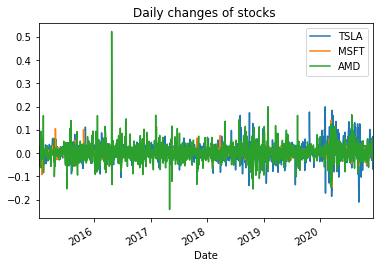

In [10]:
stock_performance = portfolio.pct_change().dropna()
stock_performance_plt = stock_performance.plot.line(title = "Daily changes of stocks ")
stock_performance_plt


for x in range(len(stock_list)):
    print(f"This graph shows us daily percent changes of {get_symbol(stock_list[x])}.")
    

*What can you see and infer from this graph? 

* Volatility
    * The greater the volatility, the wider the range of prices/returns. High volatility means that the price of the asset can change dramatically over a short time period of time in either direction. 
    * A lower volatility means the asset's value does not fluctuate as dramatically. Instead its value tends to change at a steady pace.

* Risk
    * In addition to statistical calculation of risk, you may also have an idea from a plot. The greater the volatility, the bigger the risk.


### *Cumulative Return* 

A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, in a time period. 



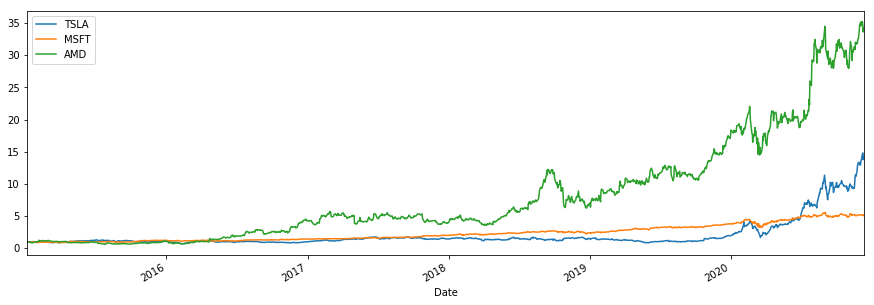

In [8]:
stock_performance_cum = (1+stock_performance).cumprod()
stock_performance_cum_plt = stock_performance_cum.plot.line(figsize=(15,5))
stock_performance_cum_plt

*What can you see and infer from this graph? 

Looking at the cumulative return of stocks helps to see general performance comparison in a timespan. 

Do not forget that this is a past performance analysis graph, not future! 

* Investment Return

    * This graph shows aggregated returns for a longer time period that shows overall performance of a stock.

* Simple calculation:

    * Starting from the defined date, you can see what happened to you $100 investment in time. Do not forget that stocks that have higher cumulative return are tend to have bigger volatility (risk). 
